
# CODE TO PREDICT ACCEPTANCE CHANCE OF UNIVERSITY ADMISSION
# Dr. Ryan Ahmed @STEMplicity
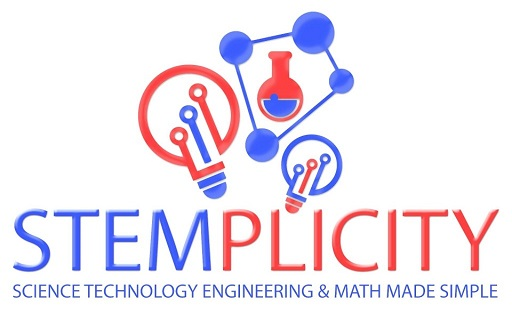



# PROBLEM STATEMENT

- In this project, a regression model is developed to predict the probability of being accepted for Graduate school.
- Data Source: https://www.kaggle.com/mohansacharya/graduate-admissions
- Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

- The dataset contains the following parameters: 
    - GRE Scores ( out of 340 ) 
    - TOEFL Scores ( out of 120 ) 
    - University Rating ( out of 5 ) 
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    - Undergraduate GPA ( out of 10 ) 
    - Research Experience ( either 0 or 1 ) 
    - Chance of Admit ( ranging from 0 to 1 )

# STEP #0: IMPORT LIBRARIES 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

In [13]:
admission_df = pd.read_csv('Admission.csv')

In [14]:
admission_df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
admission_df.tail(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
390,391,314,102,2,2.0,2.5,8.24,0,0.64
391,392,318,106,3,2.0,3.0,8.65,0,0.71
392,393,326,112,4,4.0,3.5,9.12,1,0.84
393,394,317,104,2,3.0,3.0,8.76,0,0.77
394,395,329,111,4,4.5,4.0,9.23,1,0.89
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [16]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [17]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# STEP #2: VISUALIZE DATASET

In [18]:
admission_df = admission_df.drop(['Serial No.'], axis = 1)

In [19]:
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [20]:
column_headers = admission_df.columns.values

In [21]:
column_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admission Chance'], dtype=object)

/Users/hemanthharshinee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hemanthharshinee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hemanthharshinee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

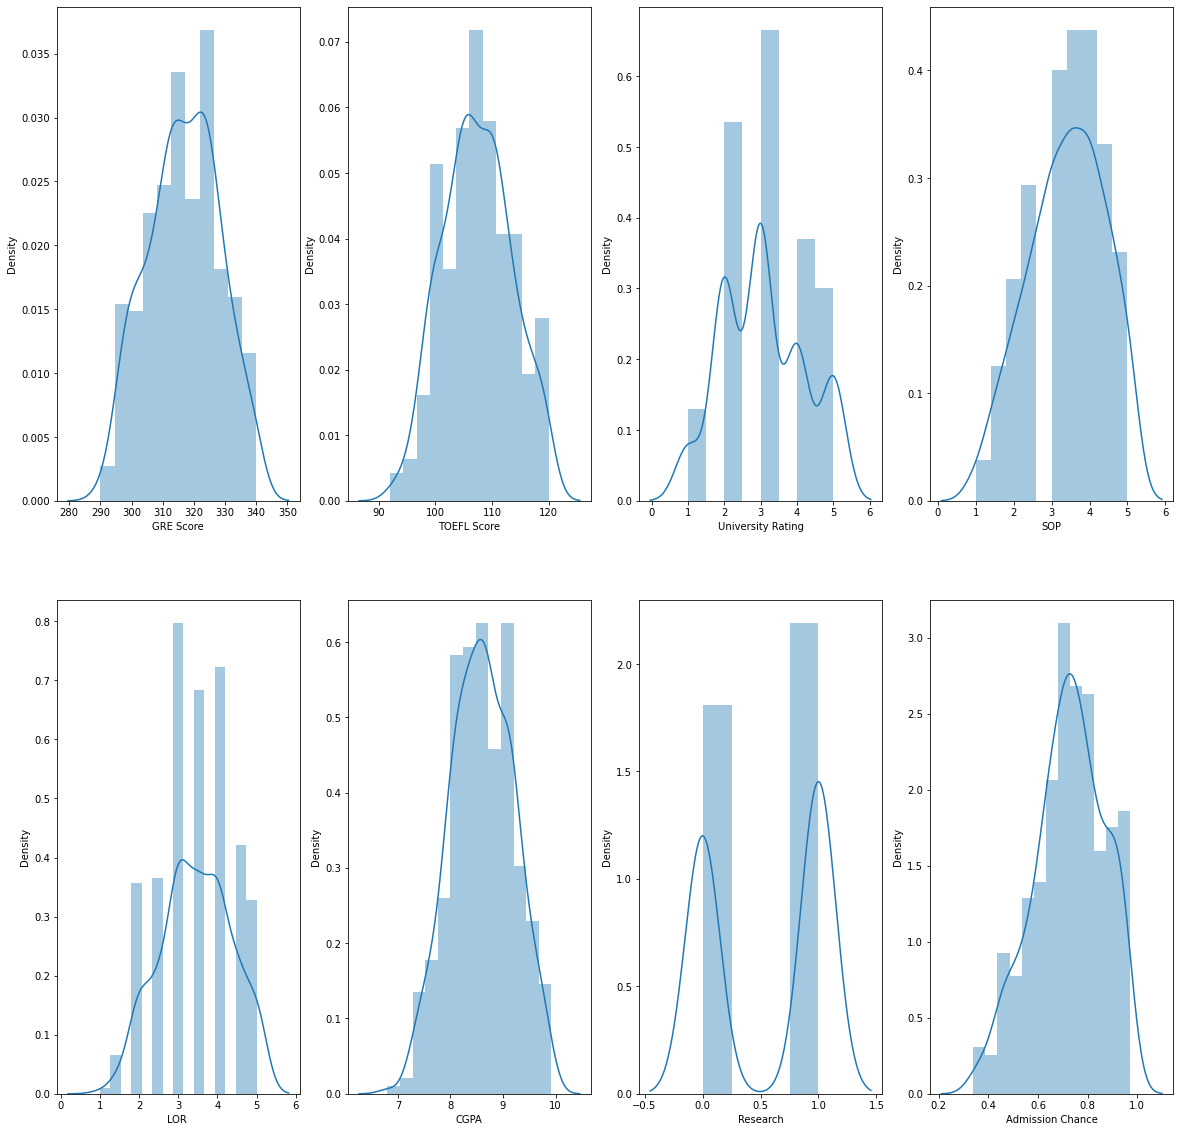

In [22]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.distplot(admission_df[column_header])
    i = i + 1


<AxesSubplot:>

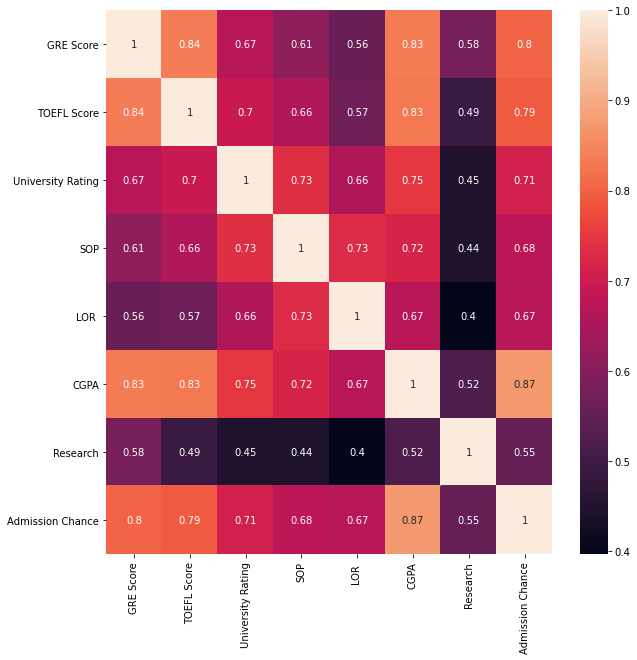

In [23]:
plt.figure(figsize = (10, 10))
sns.heatmap(admission_df.corr(), annot = True)

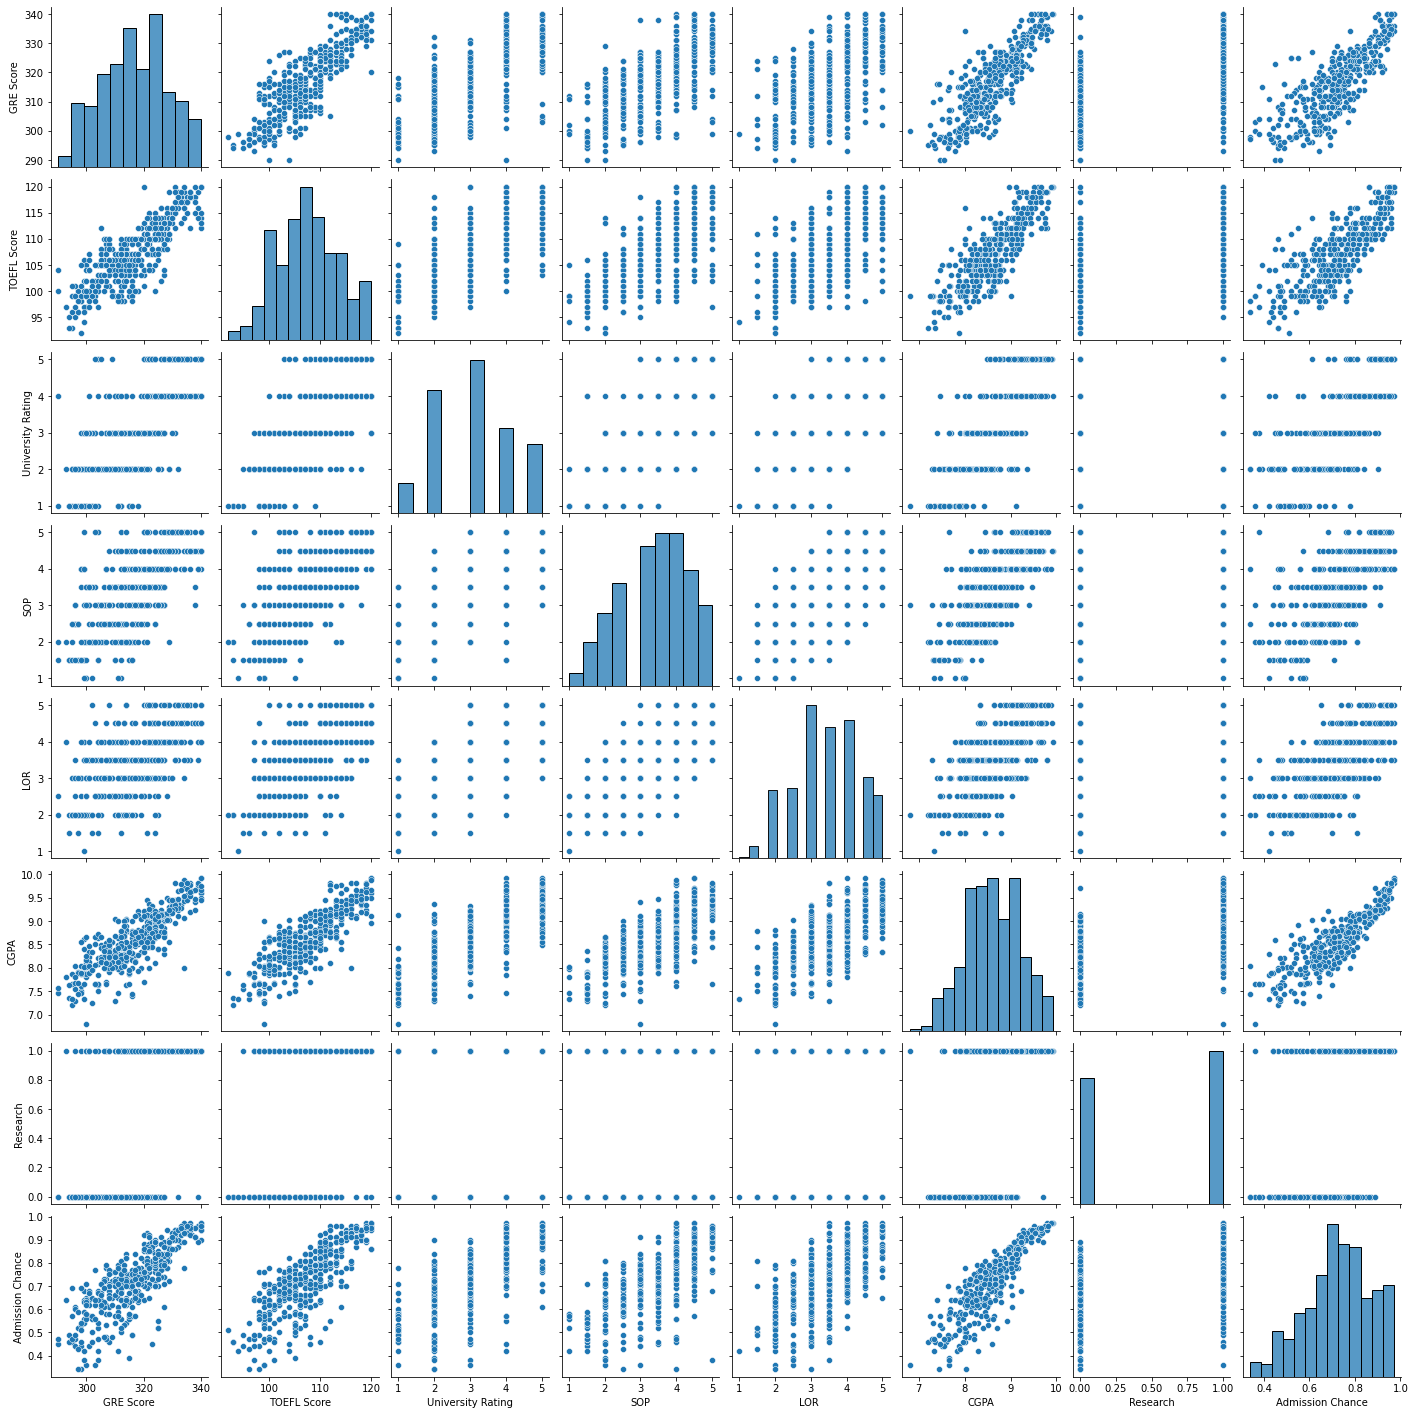

In [24]:
sns.pairplot(admission_df)

/Users/hemanthharshinee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hemanthharshinee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hemanthharshinee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

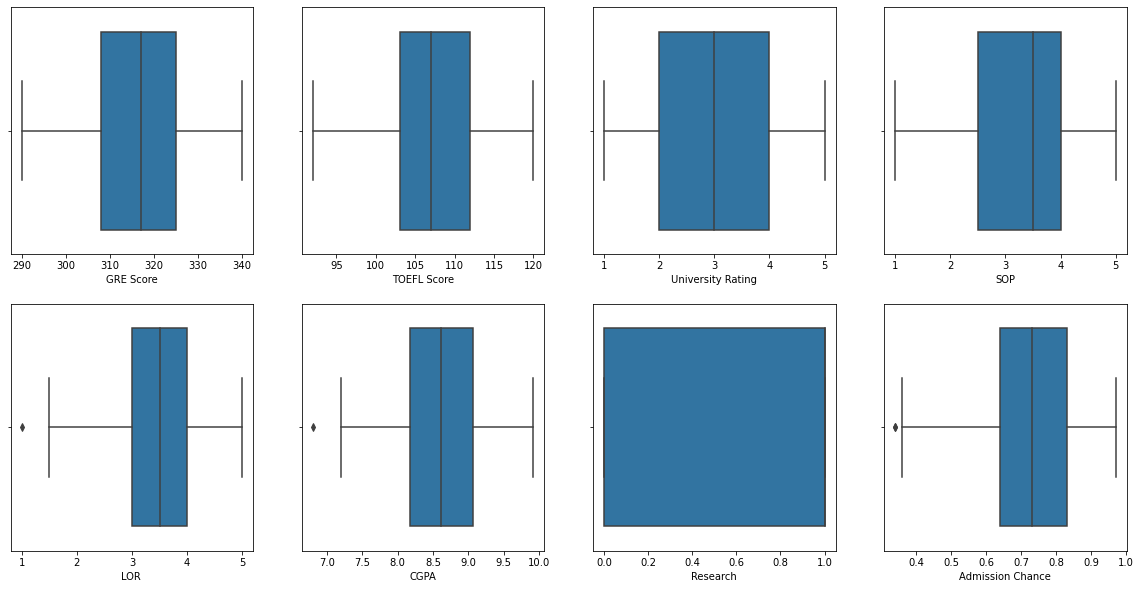

In [25]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.boxplot(admission_df[column_header])
    i = i + 1


# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

<AxesSubplot:>

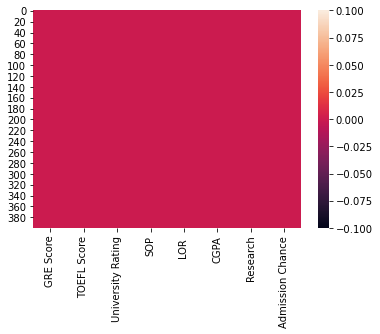

In [26]:
sns.heatmap(admission_df.isnull())

In [27]:
X = admission_df.drop(['Admission Chance'], axis = 1)

In [28]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [29]:
y = admission_df['Admission Chance']

In [30]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Admission Chance, Length: 400, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
X_train.shape

(320, 7)

In [33]:
X_test.shape

(80, 7)

# STEP #4: TRAINING THE MODEL

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)


Linear Model Coeff (m) [ 0.00122579  0.00301863  0.00914497 -0.00362008  0.01992121  0.12433801
  0.02510303]
Linear Model Coeff (b) -1.1556905422663943


# STEP #5: EVALUATING THE MODEL 

In [36]:
y_predict = regressor.predict(X_test)

Text(0.5, 0, 'True (ground truth)')

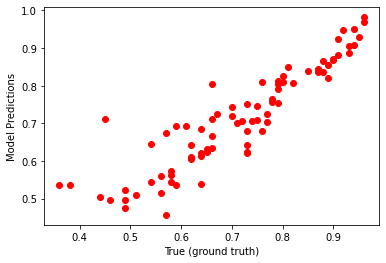

In [37]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

In [39]:
k 

7

In [40]:
n

80

In [41]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) /y_test ) ) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 


RMSE = 0.062 
MSE = 0.0038623210016494646 
MAE = 0.04369575038542532 
R2 = 0.8264705448841779 
Adjusted R2 = 0.8095996256368063 
Mean Absolute Percentage Error = 7.184575246037986 %


# STEP #6 RETRAIN AND VISUALIZE THE RESULTS

In [47]:
X = admission_df[[ 'GRE Score', 'TOEFL Score' ]]
y = admission_df['Admission Chance']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
y_predict = regressor.predict(X_test)

Text(0.5,0,'True (ground truth)')

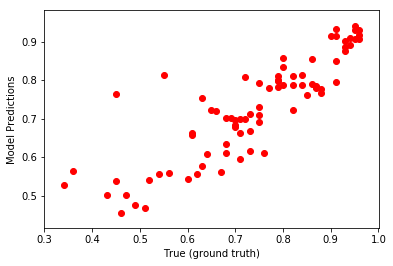

In [51]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) /y_test ) ) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 



RMSE = 0.079 
MSE = 0.006295382308791198 
MAE = 0.05672799469525327 
R2 = 0.739735043158908 
Adjusted R2 = 0.7329749144097888 
Mean Absolute Percentage Error = 8.967301515719434 %


In [57]:
from mpl_toolkits.mplot3d import Axes3D
x_surf, y_surf = np.meshgrid(np.linspace(admission_df['GRE Score'].min(), admission_df['GRE Score'].max(), 100)  , np.linspace(admission_df['TOEFL Score'].min(), admission_df['TOEFL Score'].max(), 100)  )
onlyX = pd.DataFrame({'GRE Score': x_surf.ravel(), 'TOEFL Score':y_surf.ravel()})
fittedY = regressor.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

Text(0.5,0,'Acceptance Chance')

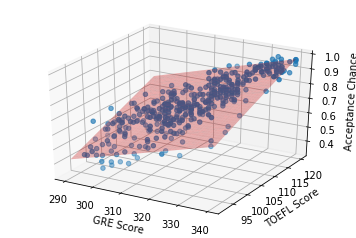

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(admission_df['GRE Score'], admission_df['TOEFL Score'], admission_df['Admission Chance'])
ax.plot_surface(x_surf, y_surf, fittedY, color = 'r', alpha = 0.3)
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Acceptance Chance')

# EXCELLENT JOB! KEEP UP THE GREAT WORK!